# Feature Selection 

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

## Load Dataset 

In [5]:
# Data Training
# df_x = pd.read_csv('x_train_data.csv', sep=',')
# df_y = pd.read_csv('y_train_data.csv', sep=',')

# Data Testing 
df_x = pd.read_csv('x_test_data.csv', sep=',')
df_y = pd.read_csv('y_test_data.csv', sep=',')

In [6]:
df_x.shape

(30944, 9)

In [7]:
df_final = pd.concat([df_x, df_y], axis=1, join='inner')
df_final.head(5)

,src,dst,Protocol,pktrate,pktperflow,dur,dur_nsec,bytecount,pktcount,label
0,1.0,14.0,1,1,30,763,231000000,72716,742,0.0
1,15.0,13.0,2,0,0,18,617000000,358668,6642,1.0
2,0.0,15.0,3,450,13527,41,685000000,20603648,19328,0.0
3,13.0,5.0,2,266,7994,258,843000000,4005450,74175,1.0
4,17.0,13.0,3,450,13527,143,187000000,70324020,65970,0.0


## Check Optimum Feature Size

In [8]:
svc = SVC(kernel='linear')
rfecv = RFECV(estimator=svc, step= 1, cv=StratifiedKFold(2), scoring='accuracy')

**Raw Dataset**

In [9]:
# df_sample =  df.sample(n=100)

# rfecv.fit(df_sample[df_sample.columns[:21]], df_sample['label'])
# print("Optimal number of features : %d" % rfecv.n_features_)

# # Plot number of features VS. cross-validation scores
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (nb of correct classifications)")
# plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
# plt.show()

**Selected Feature**

In [10]:
# df_sample =  df_final.sample(n=100)

# rfecv.fit(df_sample[df_sample.columns[:21]], df_sample['label'])
# print("Optimal number of features : %d" % rfecv.n_features_)

# # Plot number of features VS. cross-validation scores
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (nb of correct classifications)")
# plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
# plt.show()

## Feature Selection

### Heatmap 

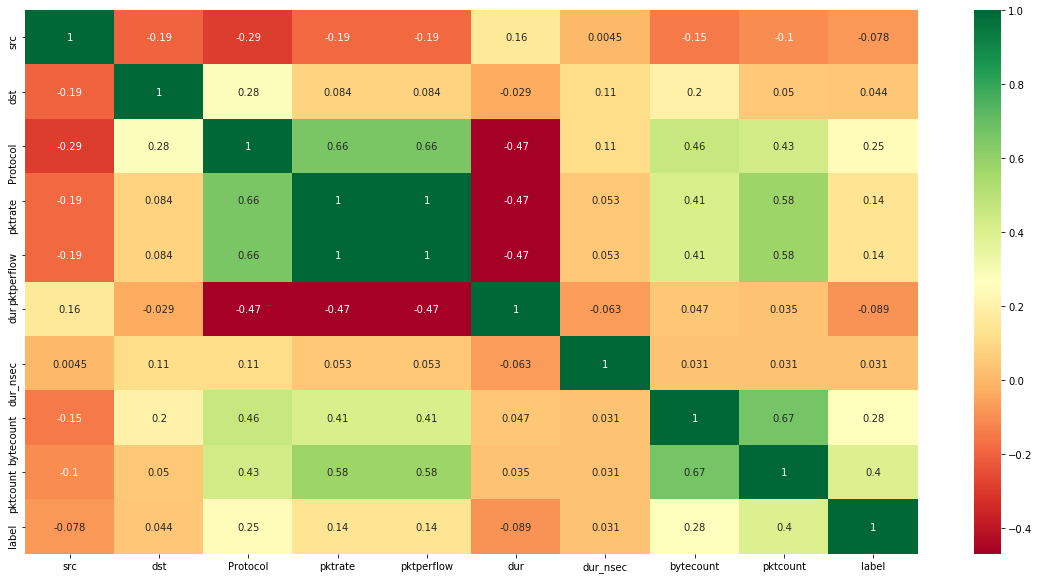

In [11]:
fig = plt.figure(figsize=(20,10))
corrMatrix = df_final.corr()
sn.heatmap(corrMatrix,annot=True,cmap ='RdYlGn')
plt.show()

### Feature Selection Using Extra Tree Classifier

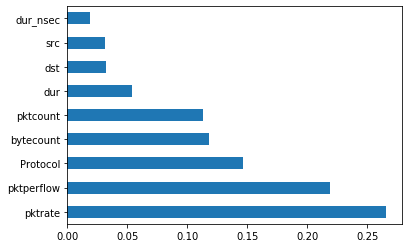

In [13]:
model= ExtraTreesClassifier() #model ini bisa dicari lagi alternatifnya mungkin ada metode lain butuh dasar paper
X = df_final[df_final.columns[:9]]
Y = df_final['label']
model.fit(X,Y)
importance = pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)
importance.nlargest(100).plot(kind='barh')
plt.show()

## Feature Selection Using Chi-Square Methods

In [14]:
X = df_final[df_final.columns[:9]]
Y = df_final['label']

#check best feature after k=9
bestfeatures = SelectKBest(score_func=chi2, k=9)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']
print(featureScores.nlargest(9,'Score'))

      Feature         Score
7   bytecount  1.461465e+11
6    dur_nsec  4.806805e+09
8    pktcount  2.557201e+08
4  pktperflow  2.941338e+06
3     pktrate  9.864656e+04
5         dur  6.008039e+04
0         src  7.738107e+02
2    Protocol  6.968995e+02
1         dst  1.444702e+02


Dari sini kita bisa menguji untuk fitur bisa kita gunakan yang sudah ditentukan dari Heatmap, Extra Tree, atau menggunakan Chi-Square. 

Selain itu juga bisa dipertimbangkan untuk melakukan pengecekan irisannya dan terhadap dataset satu lagi bisa dilihat kemungkinan irisan ini ada di **dst, protocol, src, bytecount**

In [15]:
df_heatmap = df_final
df_feature_selection = df_final[['pktrate','pktperflow','Protocol', 'src','dst','label']].copy()
df_chi_square = df_final[['dst','src','Protocol','pktcount','pktcount','label']].copy()
df_slice = df_final[['dst','src','Protocol','bytecount','label']].copy()

## Check Final Dataset 

In [16]:
df_feature_selection.head(5)

,pktrate,pktperflow,Protocol,src,dst,label
0,1,30,1,1.0,14.0,0.0
1,0,0,2,15.0,13.0,1.0
2,450,13527,3,0.0,15.0,0.0
3,266,7994,2,13.0,5.0,1.0
4,450,13527,3,17.0,13.0,0.0


In [17]:
df_chi_square.head(5)

,dst,src,Protocol,pktcount,pktcount,label
0,14.0,1.0,1,742,742,0.0
1,13.0,15.0,2,6642,6642,1.0
2,15.0,0.0,3,19328,19328,0.0
3,5.0,13.0,2,74175,74175,1.0
4,13.0,17.0,3,65970,65970,0.0


In [18]:
df_slice.head(5)

,dst,src,Protocol,bytecount,label
0,14.0,1.0,1,72716,0.0
1,13.0,15.0,2,358668,1.0
2,15.0,0.0,3,20603648,0.0
3,5.0,13.0,2,4005450,1.0
4,13.0,17.0,3,70324020,0.0


In [19]:
df_heatmap.head(5)

,src,dst,Protocol,pktrate,pktperflow,dur,dur_nsec,bytecount,pktcount,label
0,1.0,14.0,1,1,30,763,231000000,72716,742,0.0
1,15.0,13.0,2,0,0,18,617000000,358668,6642,1.0
2,0.0,15.0,3,450,13527,41,685000000,20603648,19328,0.0
3,13.0,5.0,2,266,7994,258,843000000,4005450,74175,1.0
4,17.0,13.0,3,450,13527,143,187000000,70324020,65970,0.0


## Save

In [20]:
# #Data Training
# df_heatmap.to_csv("processed_dataset_10.csv", sep=',', index=False)
# df_feature_selection.to_csv("processed_dataset_5.csv", sep=',', index=False)
# df_chi_square.to_csv("processed_dataset_chi_square.csv", sep=',', index=False)
# df_slice.to_csv('processed_dataset_slice.csv', sep=',', index=False)

# Data Testing
df_heatmap.to_csv("test_processed_dataset_10.csv", sep=',', index=False)
df_feature_selection.to_csv("test_processed_dataset_5.csv", sep=',', index=False)
df_chi_square.to_csv("test_processed_dataset_chi_square.csv", sep=',', index=False)
df_slice.to_csv('test_processed_dataset_slice.csv', sep=',', index=False)